In [1]:
#pip install --upgrade category_encoders

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
from sklearn.metrics import log_loss


In [2]:
#import dataset
hr_df = pd.read_csv('Maternal Health Risk Data Set.csv')
hr_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
#Q2:Data Types
hr_df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [4]:
#Q2:How many instances
print("Cancer data set dimensions : {}".format(hr_df.shape))

Cancer data set dimensions : (1014, 7)


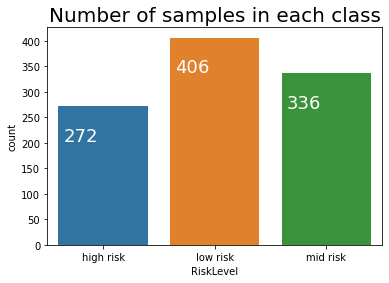

In [8]:
ax = sns.countplot(x="RiskLevel", data=hr_df)
ax.set_title('Number of samples in each class', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [6]:
#Q2:Summary of data
print(hr_df.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


<AxesSubplot:>

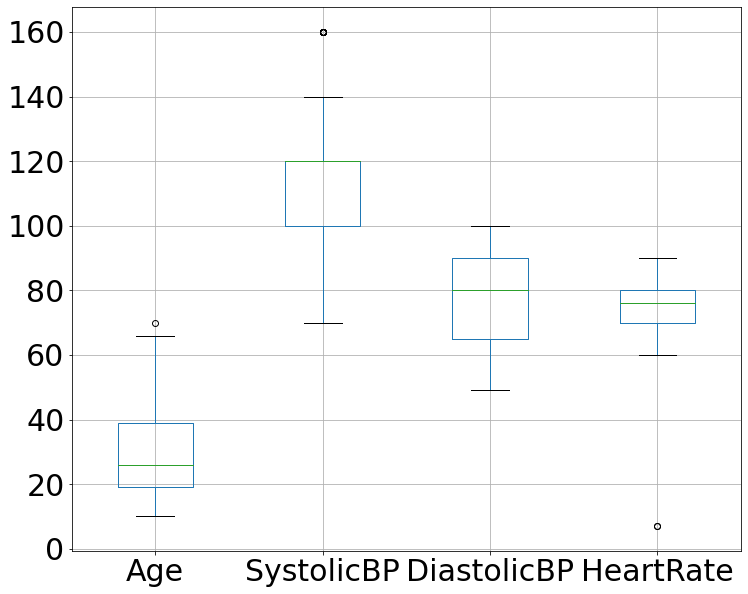

In [7]:
#Q2:Boxplot for discrete data
hr_df.boxplot(column=(['Age','SystolicBP','DiastolicBP','HeartRate']),fontsize=30,figsize=(12,10))


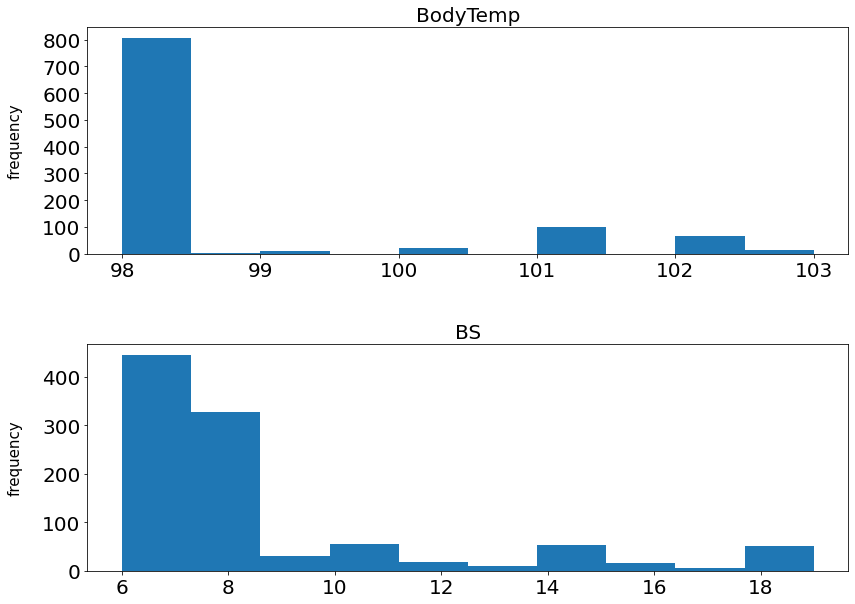

In [8]:
#Q2:Boxplot for continuous data
fig = plt.figure(figsize=(30,10))

fig.add_subplot(221)
plt.hist(hr_df['BodyTemp'])
plt.title('BodyTemp', fontsize=20)
plt.ylabel("frequency", fontsize=15, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

fig.add_subplot(223)
plt.hist(hr_df['BS'])
plt.title('BS', fontsize=20)
plt.ylabel("frequency", fontsize=15, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

fig.subplots_adjust(hspace = 0.4)

plt.show()

In [9]:
#Check for missing or Null Data points
hr_df.isnull().sum()
hr_df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [10]:
#Q3:Create train and test splits
X = hr_df.drop(['RiskLevel'], axis=1) #input/feature vector
y = hr_df['RiskLevel']#target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.head()
X_test.head()



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
809,29,130,70,7.9,98.0,78
77,55,120,90,12.0,98.0,70
282,45,120,95,7.7,98.0,66
845,42,120,90,9.0,98.0,70
760,21,90,60,6.9,98.0,86


Number of tree nodes:  297


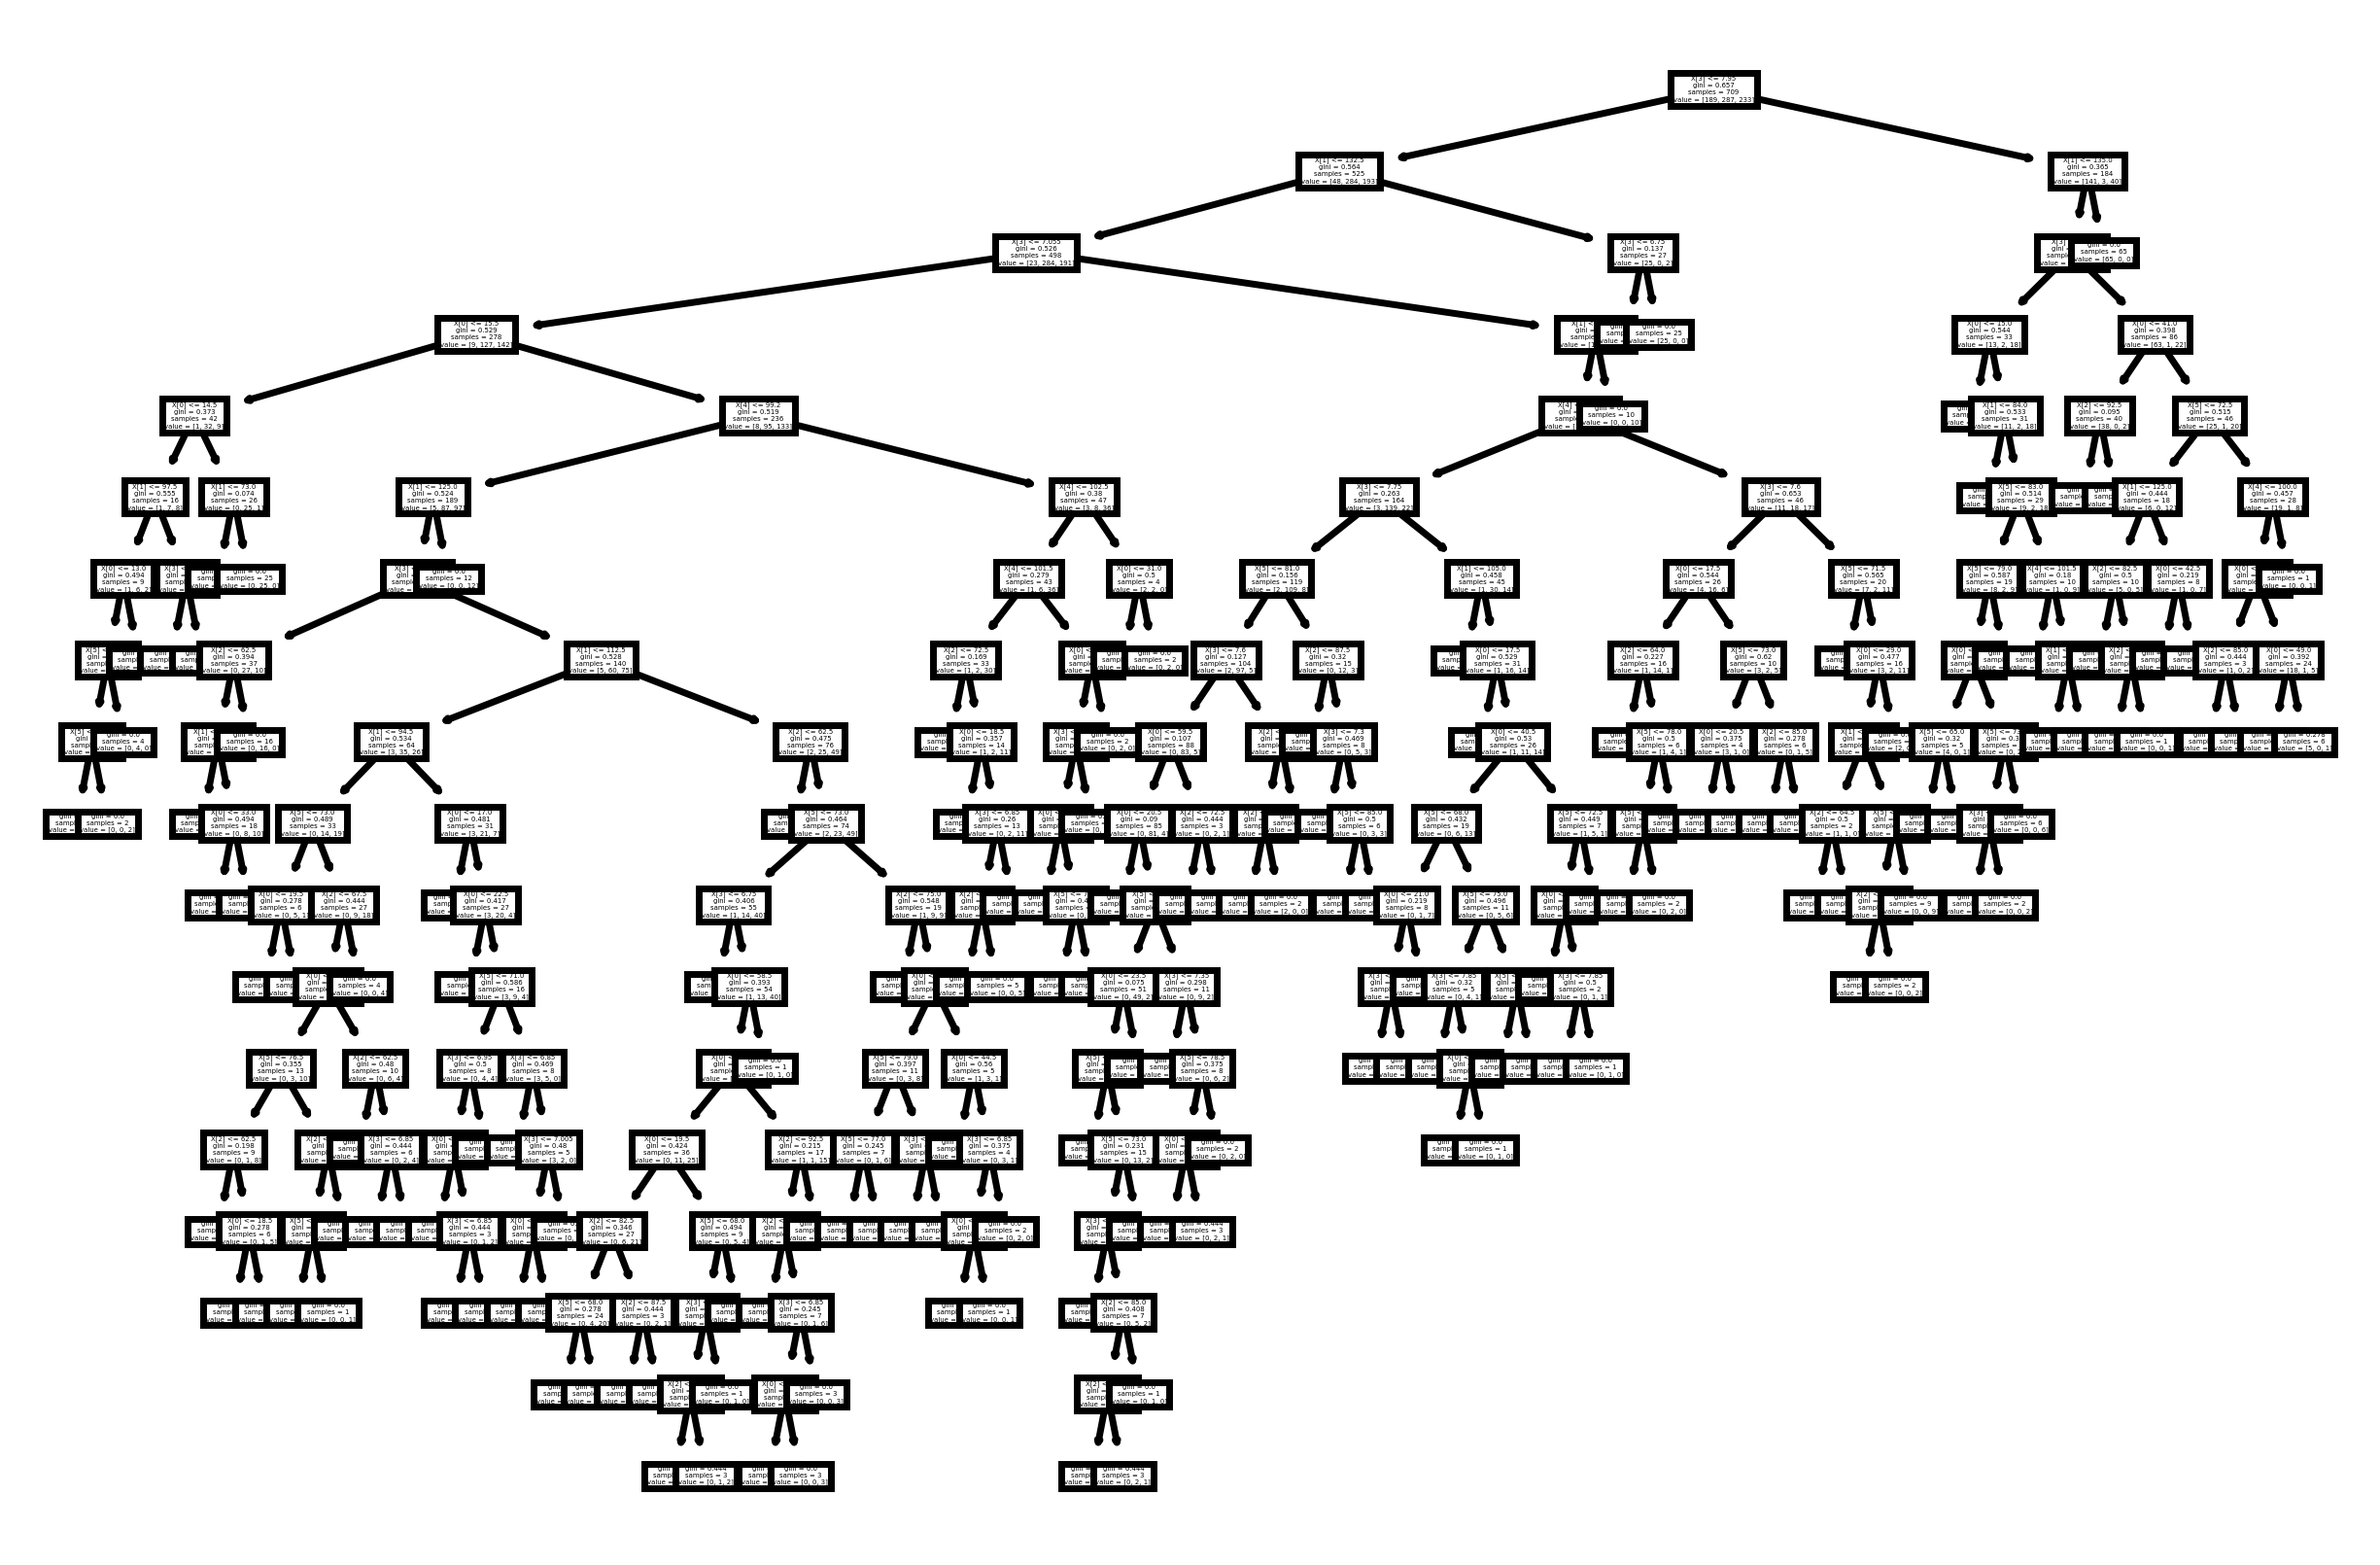

Accuracy score of our model with Decision Tree: 0.71


In [27]:
#Q3,a:Creating initial Decision tree classifier
predict_opt=dt_opt.predict(X_test)
dt = tree.DecisionTreeClassifier(random_state=47)
#Train Decision Tree Classifier
tdt=dt.fit(X_train,y_train)
print('Number of tree nodes: ', tdt.tree_.node_count) # Print out the result
#Plot Initial Decision Tree
plt.figure(dpi=500)
tree.plot_tree(tdt)
plt.show() #show the tree 
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)

max_depth=2 Average 10-Fold CV Score:0.6271791885070859 Node count:7
max_depth=3 Average 10-Fold CV Score:0.6035818287711123 Node count:13
max_depth=4 Average 10-Fold CV Score:0.6478741991846243 Node count:21
max_depth=5 Average 10-Fold CV Score:0.6646476412347117 Node count:33
max_depth=6 Average 10-Fold CV Score:0.6290526111434673 Node count:53
max_depth=7 Average 10-Fold CV Score:0.6903708017860609 Node count:79
max_depth=8 Average 10-Fold CV Score:0.6932828576975344 Node count:105
max_depth=9 Average 10-Fold CV Score:0.7355562026790914 Node count:135
max_depth=10 Average 10-Fold CV Score:0.7514366142496602 Node count:165
max_depth=11 Average 10-Fold CV Score:0.7632595612502426 Node count:191
max_depth=12 Average 10-Fold CV Score:0.7770335857115123 Node count:219
max_depth=13 Average 10-Fold CV Score:0.7986604542807221 Node count:249
max_depth=14 Average 10-Fold CV Score:0.8035818287711125 Node count:271
max_depth=15 Average 10-Fold CV Score:0.8045428072218987 Node count:285
max_dep

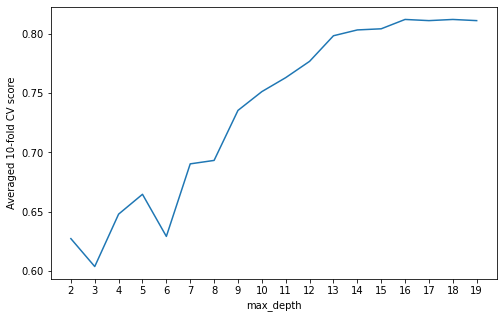

In [12]:
nrow, ncol = hr_df.shape
predictors = hr_df.iloc[:, :ncol - 1]
target = hr_df.iloc[:, -1]
cv= cross_val_score(dt,predictors,target,cv=10)

#Q3,a:Tune 'max_depth' parameter.
maxdepth_cv=[]
node_counts=[]
for k in range(2,20,1):
    dt=DecisionTreeClassifier(max_depth=k,random_state=47)
    dt.fit(X_train,y_train)
    predict=dt.predict(X_test)
    cv= cross_val_score(dt,predictors,target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    maxdepth_cv.append(np.mean(cv))
    node_counts.append(nodecount)     
#Q3,a:Plot averaged CV scores for all max_depth tunings
fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(2,20,1))
k=range(2,20,1)
plt.plot(k,maxdepth_cv)
plt.xlabel("max_depth")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

max_depth=2 Average 10-Fold CV Score:0.5877305377596582 Node count:3
max_depth=3 Average 10-Fold CV Score:0.6271791885070859 Node count:5
max_depth=4 Average 10-Fold CV Score:0.5986022131624927 Node count:7
max_depth=5 Average 10-Fold CV Score:0.6134148708988546 Node count:9
max_depth=6 Average 10-Fold CV Score:0.6134148708988546 Node count:11
max_depth=7 Average 10-Fold CV Score:0.6341195884294311 Node count:13
max_depth=8 Average 10-Fold CV Score:0.6319452533488643 Node count:15
max_depth=9 Average 10-Fold CV Score:0.6398466317219957 Node count:17
max_depth=10 Average 10-Fold CV Score:0.6428072218986605 Node count:19
max_depth=11 Average 10-Fold CV Score:0.6467967384973791 Node count:21
max_depth=12 Average 10-Fold CV Score:0.650757134536983 Node count:23
max_depth=13 Average 10-Fold CV Score:0.6350902737332557 Node count:25
max_depth=14 Average 10-Fold CV Score:0.6499320520287323 Node count:27
max_depth=15 Average 10-Fold CV Score:0.652892642205397 Node count:29
max_depth=16 Average

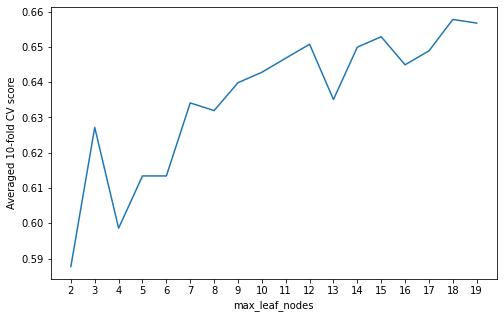

In [13]:
cv= cross_val_score(dt,predictors,target,cv=10)

#Q3,a:Tune 'max_leaf_nodes' parameter.
maxdepth_cv=[]
node_counts=[]
for k in range(2,20,1):
    dt=DecisionTreeClassifier(max_depth=16,max_leaf_nodes=k ,random_state=47)
    dt.fit(X_train,y_train)
    predict=dt.predict(X_test)
    cv= cross_val_score(dt,predictors,target,cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth={}".format(k), "Average 10-Fold CV Score:{}".format(np.mean(cv)),
          "Node count:{}".format(nodecount))
    maxdepth_cv.append(np.mean(cv))
    node_counts.append(nodecount)     
#Q3,a:Plot averaged CV scores for all max_depth tunings
fig,axes=plt.subplots(1,1,figsize=(8,5))
axes.set_xticks(range(2,20,1))
k=range(2,20,1)
plt.plot(k,maxdepth_cv)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Averaged 10-fold CV score")
plt.show()

Number of tree nodes after optimizing max depth and max leaf nodes:  35


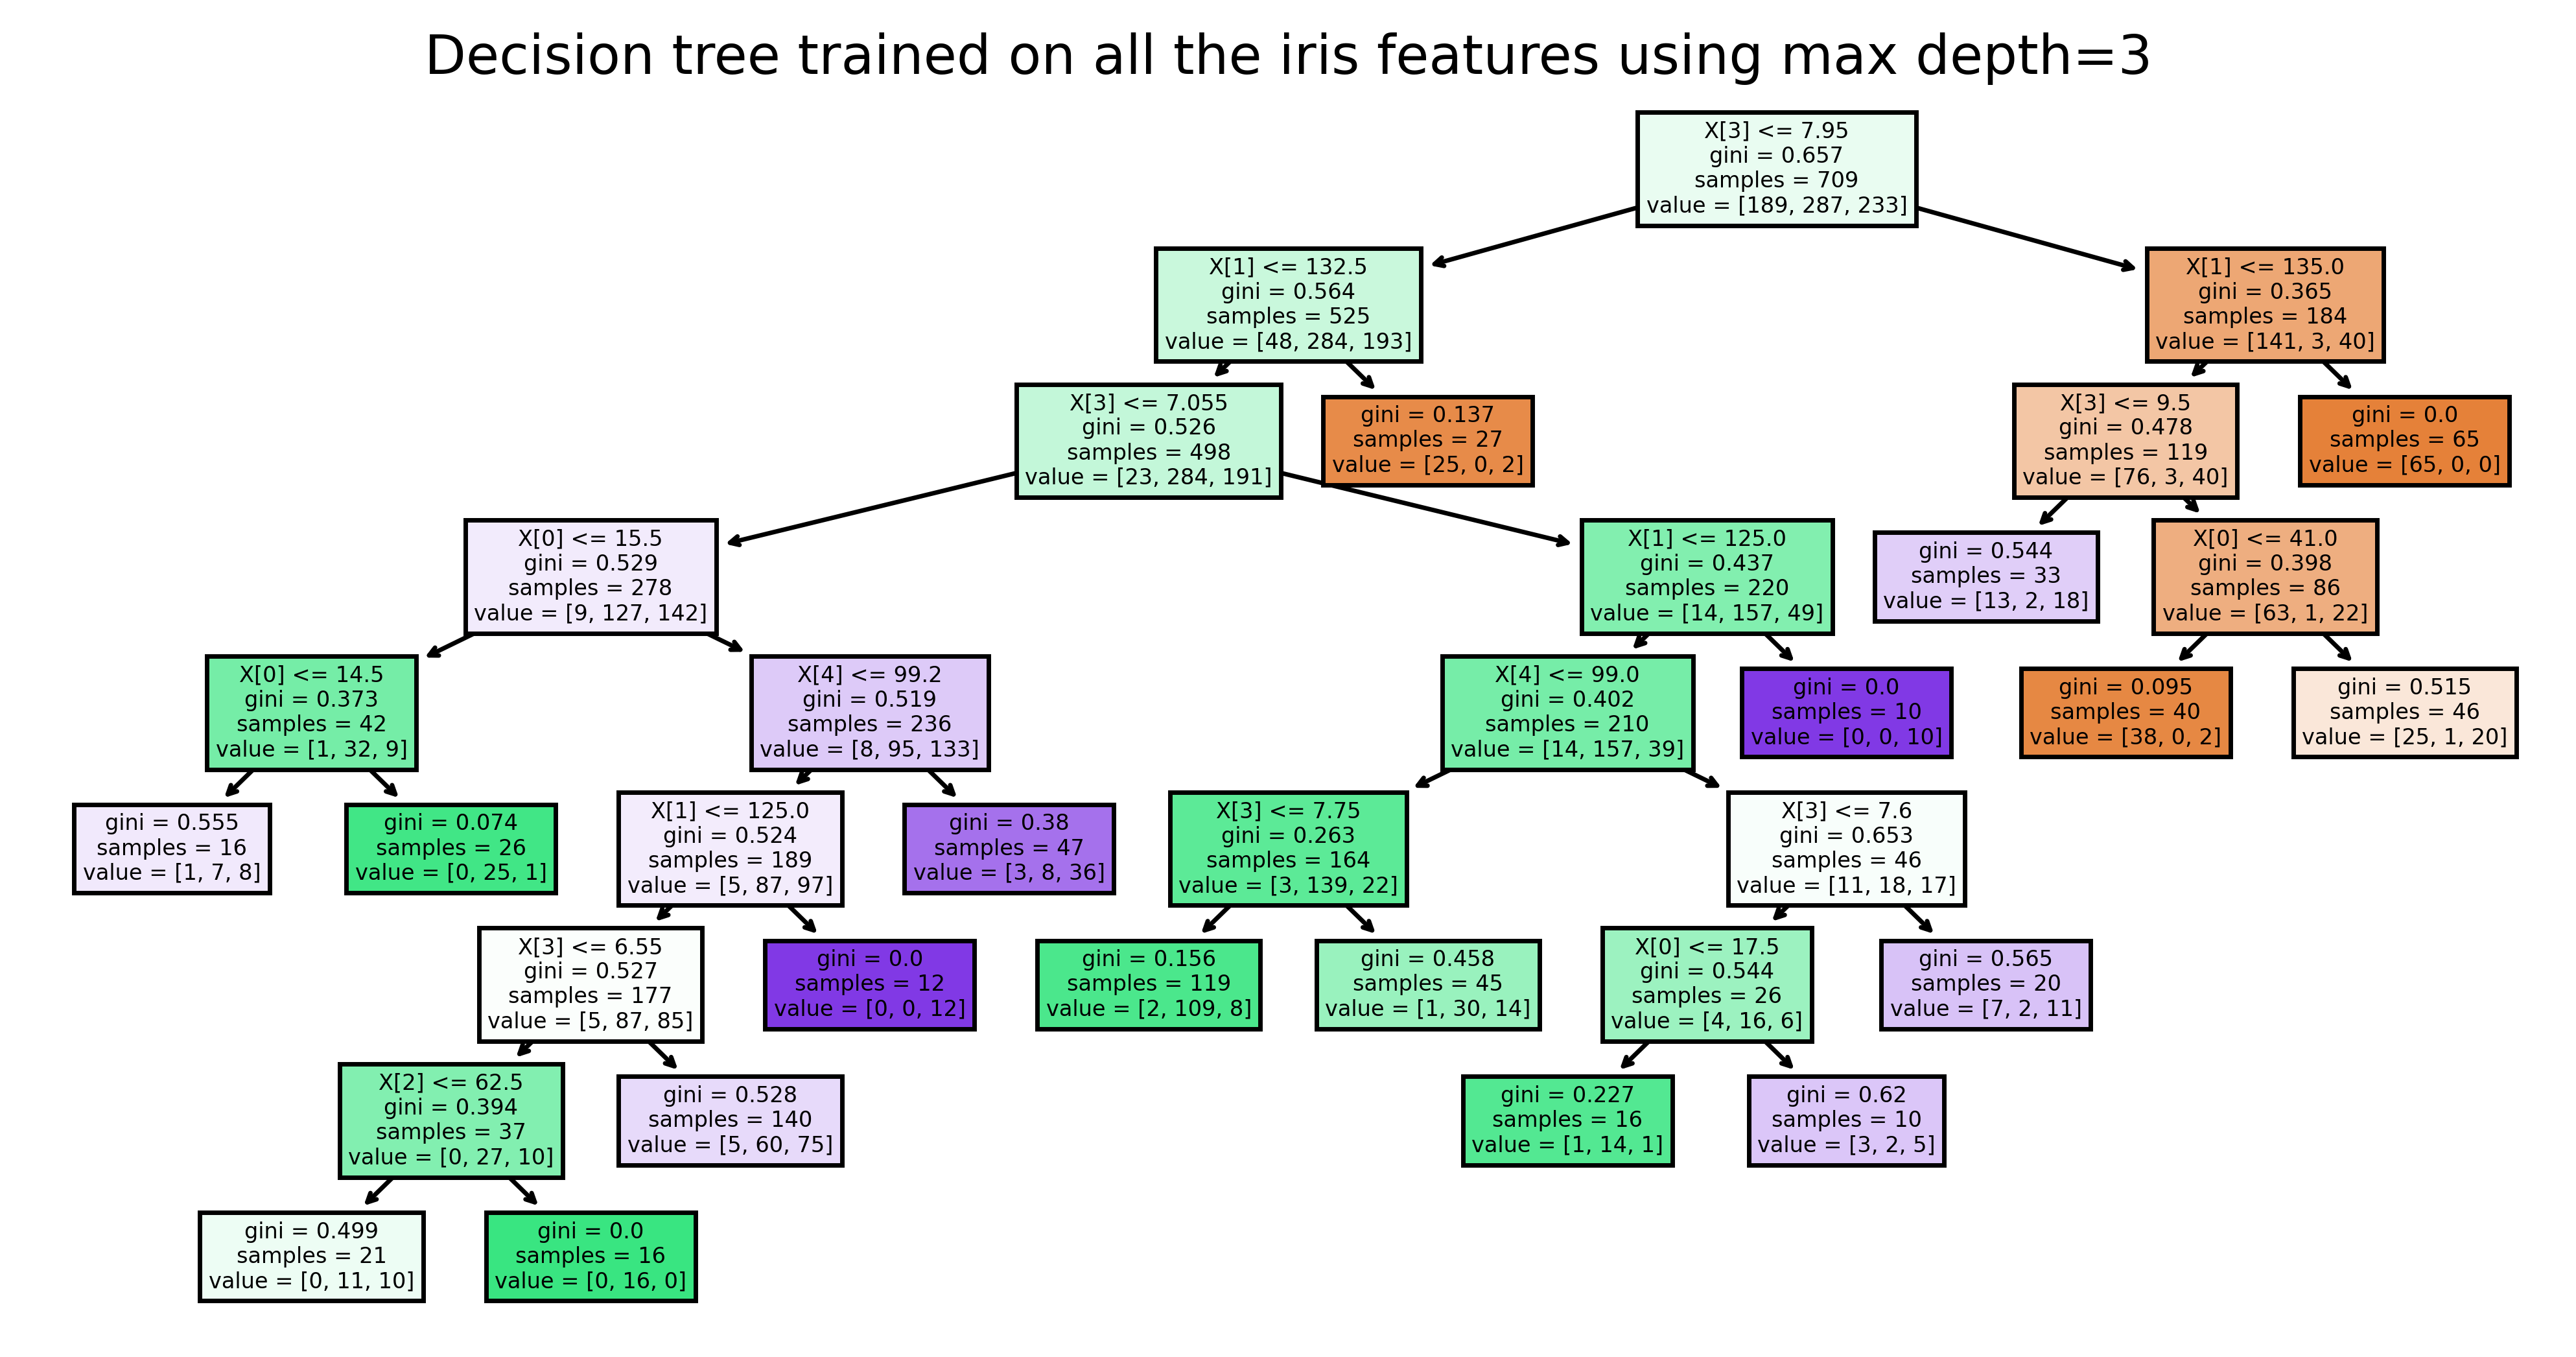

Accuracy score of our model with Decision Tree: 0.68


In [115]:
#Q3,a:
dt_opt=DecisionTreeClassifier(max_depth=16,max_leaf_nodes=18, random_state=47)
dt_opt_fit=dt_opt.fit(X_train,y_train)
predict_opt=dt_opt.predict(X_test)
print('Number of tree nodes after optimizing max depth and max leaf nodes: ', dt_opt_fit.tree_.node_count) # Print out the result
plt.figure(figsize=(10,5),dpi=500)
tree.plot_tree(dt_opt,filled=True)
plt.title("Decision tree trained on all the iris features using max depth=3")
plt.show()
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)

[[69 11  3]
 [15 57 31]
 [ 7 21 91]]


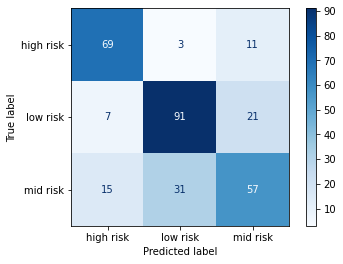

In [116]:
#Q3,c:
DTC = DecisionTreeClassifier(max_depth = 16, min_samples_leaf = 4, random_state = 27)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)

print(confusion_matrix(y_test, y_predict, labels=['high risk','mid risk','low risk'])) # retrieve confusion matrix
plot_confusion_matrix(DTC, X_test, y_test, cmap=plt.cm.Blues) # plot confusion matrix


In [18]:
#Q3,c:

################# high risk ###################################
# not high + not high (anything that doesn't include high risk)
h_tn = 93+30 + 27+64

# high + high
h_tp = 57

# true high + not high
h_fn = 7+11

# predicted high + not high
h_fp = 15+1



################# mid risk ###################################
# not mid + not mid (anything that doesn't include mid risk)
m_tn = 57+7 + 1+93

# mid + mid
m_tp = 64

# true mid + not mid
m_fn = 15+27

# predicted mid + not mid
m_fp = 11+30



################# low risk ###################################
# not low + not low (anything that doesn't include low risk)
l_tn = 57+11 + 15+64

# low + low
l_tp = 93

# true low + not low
l_fn = 1+30

# predicted low + not low
l_fp = 27+7



# Accuracy
h_acc = (h_tn+h_tp)/(h_tn+h_fp+h_tp+h_fn)
m_acc = (m_tn+m_tp)/(m_tn+m_fp+m_tp+m_fn)
l_acc = (l_tn+l_tp)/(l_tn+l_fp+l_tp+l_fn)

# Precision
h_prec=h_tp/(h_tp+h_fp)
m_prec=m_tp/(m_tp+m_fp)
l_prec=l_tp/(l_tp+l_fp)

# Recall
h_rec=h_tp/(h_tp+h_fn)
m_rec=m_tp/(m_tp+m_fn)
l_rec=l_tp/(l_tp+l_fn)

# F1 score
h_f1=2*((h_prec*h_rec)/(h_prec+h_rec))
m_f1=2*((m_prec*m_rec)/(m_prec+m_rec))
l_f1=2*((l_prec*l_rec)/(l_prec+l_rec))

risks = {'High Risk': [h_acc, h_prec, h_rec, h_f1],
         'Mid Risk': [m_acc, m_prec, m_rec, m_f1],
         'Low Risk': [l_acc, l_prec, l_rec, l_f1]
        }

confusion_matrix_df = pd.DataFrame(risks, index =['Accuracy',
                                'Precision',
                                'Recall',
                                'F1 score'])

confusion_matrix_df

,High Risk,Mid Risk,Low Risk
Accuracy,0.888525,0.727869,0.786885
Precision,0.780822,0.609524,0.732283
Recall,0.760000,0.603774,0.750000
F1 score,0.770270,0.606635,0.741036


Feature 0: 31.036080
Feature 1: 60.251055
Feature 2: 52.542856
Feature 3: 214.088584
Feature 4: 16.186885
Feature 5: 13.239036


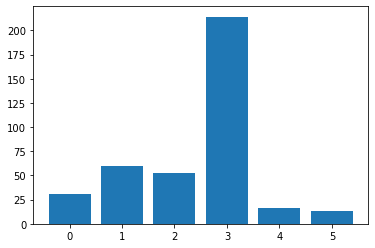

In [19]:
#Q3,d:Feature importance 
fs = SelectKBest(score_func=f_classif, k=6) 
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

fs_score_df=pd.DataFrame()
feature_no=0
feature_score=0
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    fs_score_df = fs_score_df.append({feature_no:i,feature_score:fs.scores_[i]}, ignore_index=True)
    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [20]:
#Q3,d:plotting feature importance into table for readability
df=pd.DataFrame(fs.scores_,columns=['F-score'], index=hr_df.columns[0:6])
df

,F-score
Age,31.036080
SystolicBP,60.251055
DiastolicBP,52.542856
BS,214.088584
BodyTemp,16.186885
HeartRate,13.239036


Feature 0: 33.702792
Feature 1: 71.716968
Feature 2: 66.112841
Feature 3: 243.905624
Feature 4: 11.296673
Feature 5: 18.891135


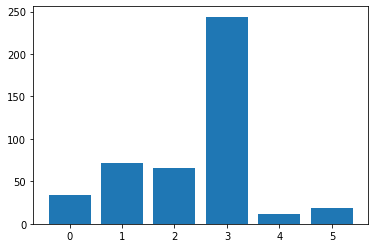

,F-score
BS,243.905624
SystolicBP,71.716968
DiastolicBP,66.112841
Age,33.702792
HeartRate,18.891135


In [107]:
#Q4,a:feature selection using ANOVA f 

X = hr_df.iloc[:, 0:6].values 
y = hr_df.iloc[:, 6].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

fs = SelectKBest(score_func=f_classif, k=6) 
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

fs_score_df=pd.DataFrame()
feature_no=0
feature_score=0
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    fs_score_df = fs_score_df.append({feature_no:i,feature_score:fs.scores_[i]}, ignore_index=True)
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

df=pd.DataFrame(fs.scores_,columns=['F-score'], index=hr_df.columns[0:6])
df.sort_values(by=['F-score'], inplace=True, ascending=False)
df.head(5)

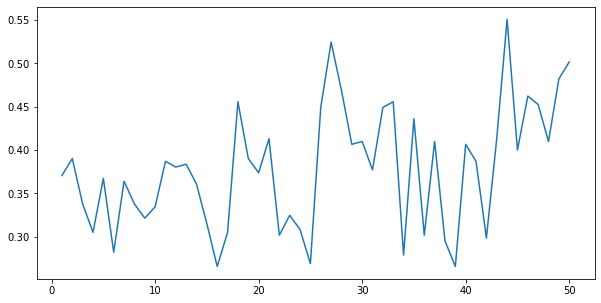

In [108]:
#Q4,b:MLPClassifier, Single hidden layer, 1-25 neurons
iterations_df = pd.DataFrame(columns=['Max Iteration', 'MLP Accuracy'])

for k in range(1,51):
    mlp=MLPClassifier(hidden_layer_sizes=(25,), max_iter=k, solver='adam')
    mlp.fit(X_train, y_train)
    mlp_predict = mlp.predict(X_test)
        
    score = {
        'Max Iteration': k,
        'MLP Accuracy': accuracy_score(y_test, mlp_predict)
    }

    iterations_df = iterations_df.append(score, ignore_index=True)
    
iterations_df.head()

plt.figure(figsize=(10,5))
plt.plot(iterations_df['Max Iteration'], iterations_df['MLP Accuracy'])
plt.show()

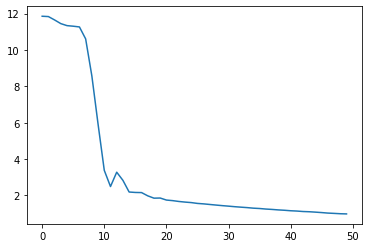

In [109]:
#Q4, c: Plot the loss
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.show()

In [112]:
#Q4, d:Experiment with two hidden layers
layers_df = pd.DataFrame(columns=['Neuron', 'MLP Accuracy'])
layers_df

for k in range(1,25):
    mlp=MLPClassifier(hidden_layer_sizes=(25-k,k), max_iter=34, solver='adam')
    mlp.fit(X_train, y_train)
    mlp_predict = mlp.predict(X_test)
    
    df = {
        'Neuron': (25-k,k),
        'MLP Accuracy': accuracy_score(y_test, mlp_predict)
    }
    
    layers_df = layers_df.append(df, ignore_index=True)
    
layers_df

,Neuron,MLP Accuracy
0,"(24, 1)",0.390164
1,"(23, 2)",0.518033
2,"(22, 3)",0.390164
3,"(21, 4)",0.363934
4,"(20, 5)",0.390164
5,"(19, 6)",0.445902
6,"(18, 7)",0.413115
7,"(17, 8)",0.462295
8,"(16, 9)",0.419672
9,"(15, 10)",0.334426


In [121]:
#Q5: Comparing accuracy scores of the two models.
predict_opt=dt_opt.predict(X_test)
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Decision Tree:", '%.2f'%acc_score)

predict_opt=mlp.predict(X_test)
acc_score=accuracy_score(y_test, predict_opt)
print("Accuracy score of our model with Neural Network:", '%.2f'%acc_score)

Accuracy score of our model with Decision Tree: 0.68
Accuracy score of our model with Neural Network: 0.39
